In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

wine_red = pd.read_csv('csv/winequality-red.csv', sep=',')

In [10]:
import numpy as np
from scipy import stats as st

# スミルノフ=グラブス検定
data = wine_red['total sulfur dioxide']
alpha = 0.5

x, o = list(data), []
while True:
   n = len(x)
   t = st.t.isf(q=(alpha / n) / 2, df=n - 2)
   tau = (n - 1) * t / np.sqrt(n * (n - 2) + n * t * t)
   i_min, i_max = np.argmin(x), np.argmax(x)
   myu, std = np.mean(x), np.std(x, ddof=1)
   i_far = i_max if np.abs(x[i_max] - myu) > np.abs(x[i_min] - myu) else i_min
   tau_far = np.abs((x[i_far] - myu) / std)
   if tau_far < tau: break
   o.append(x.pop(i_far))

not_out = np.array(x)
out = np.array(o)
out.astype('int').tolist()


[289, 278, 165]

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


sc = StandardScaler()
wine_red_cls = wine_red[['free sulfur dioxide', 'total sulfur dioxide']].copy()
clustering_sc = sc.fit_transform(wine_red_cls)

kmeans = KMeans(n_clusters=2, random_state=0, n_init='auto')
clusters = kmeans.fit(clustering_sc)
wine_red_cls['cluster'] = clusters.labels_

In [36]:
pca = PCA(n_components=2)
x = clustering_sc
pca.fit(x)
x_pca = pca.transform(x)
pca_df = pd.DataFrame(x_pca)
pca_df['cluster'] = wine_red_cls['cluster']

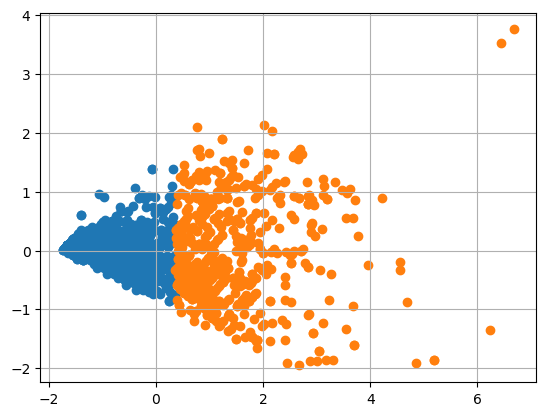

In [44]:
for i in wine_red_cls['cluster'].unique():
    tmp = pca_df.loc[pca_df['cluster'] == i]
    plt.scatter(tmp[0], tmp[1])

plt.grid()


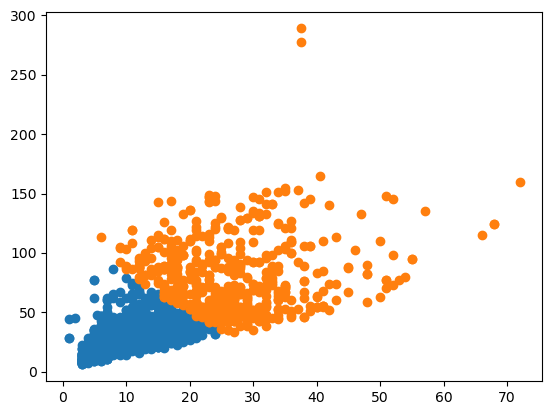

In [76]:
sc = StandardScaler()
wine_red_cls = wine_red[['free sulfur dioxide', 'total sulfur dioxide']].copy()
clustering_sc = sc.fit_transform(wine_red_cls)

kmeans = KMeans(n_clusters=2, random_state=0, n_init='auto')
clusters = kmeans.fit(clustering_sc)
wine_red_cls['cluster'] = clusters.labels_

for i in wine_red_cls['cluster'].unique():
    tmp = wine_red_cls.loc[pca_df['cluster'] == i]
    plt.scatter(tmp['free sulfur dioxide'], tmp['total sulfur dioxide'])



## 欠損値

In [98]:
import pandas  as pd

table = pd.read_csv('csv/user_table.csv')
table.head()

,user_id,name,nickname,age,country,num_family,married,job,income,profile
0,14742,Richard Chen,kathryn77,20.0,NaN,1.0,0.0,Human resources officer,394.0,Last sit star physical accept. Actually relate...
1,21530,Kayla Garcia,brandtalexander,59.0,Saint Kitts and Nevis,4.0,0.0,"Teacher, early years/pre",370.0,Door entire as. Whose suddenly mission hold.\n...
2,34985,Troy Blackwell,richardfarmer,44.0,Iraq,3.0,2.0,Forensic psychologist,326.0,Writer drug a tax. Team standard both write pr...
3,31854,Suzanne Ray,nicole40,52.0,Sri Lanka,NaN,0.0,Garment/textile technologist,673.0,Evidence try next degree man local. Movie sea ...
4,46689,Susan Horn,heather38,NaN,Japan,1.0,0.0,Nature conservation officer,306.0,Voice after assume hard tonight. Recent try ma...


In [104]:
#欠損データの表示
pd.DataFrame(table.isna().sum()).T

,user_id,name,nickname,age,country,num_family,married,job,income,profile
0,0,0,0,5131,10148,2570,2456,0,2527,0


In [108]:
table_drop = table.copy()

#リストワイズ削除法
table_drop = table.dropna()

rows = []
rows_drop = []
for column in table.columns:
   rows.append(table[column].count())
   rows_drop.append(table_drop[column].count())

df = pd.DataFrame()
df['項目名'] = table.columns
df['削除前件数'] = rows
df['削除後件数'] = rows_drop
df

,項目名,削除前件数,削除後件数
0,user_id,50103,30714
1,name,50103,30714
2,nickname,50103,30714
3,age,44972,30714
4,country,39955,30714
5,num_family,47533,30714
6,married,47647,30714
7,job,50103,30714
8,income,47576,30714
9,profile,50103,30714


In [120]:
#ペアワイズ削除法
#欠損お多い特徴量を削除
drop_df = table.drop(['age', 'country'], axis=1)

user_table_drop = drop_df.dropna()

df = pd.DataFrame()
df['項目'] = user_table_drop.columns
rows = []
rows_drop = []

for i in drop_df.columns:
    rows.append(drop_df[i].count())
    rows_drop.append(user_table_drop[i].count())

df['処理前'] = rows
df['処理後'] = rows_drop
df

,項目,処理前,処理後
0,user_id,50103,42940
1,name,50103,42940
2,nickname,50103,42940
3,num_family,47533,42940
4,married,47647,42940
5,job,50103,42940
6,income,47576,42940
7,profile,50103,42940


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='income', ylabel='密度'>

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23494 (\N{CJK UNIFIED IDEOGRAPH-5BC6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


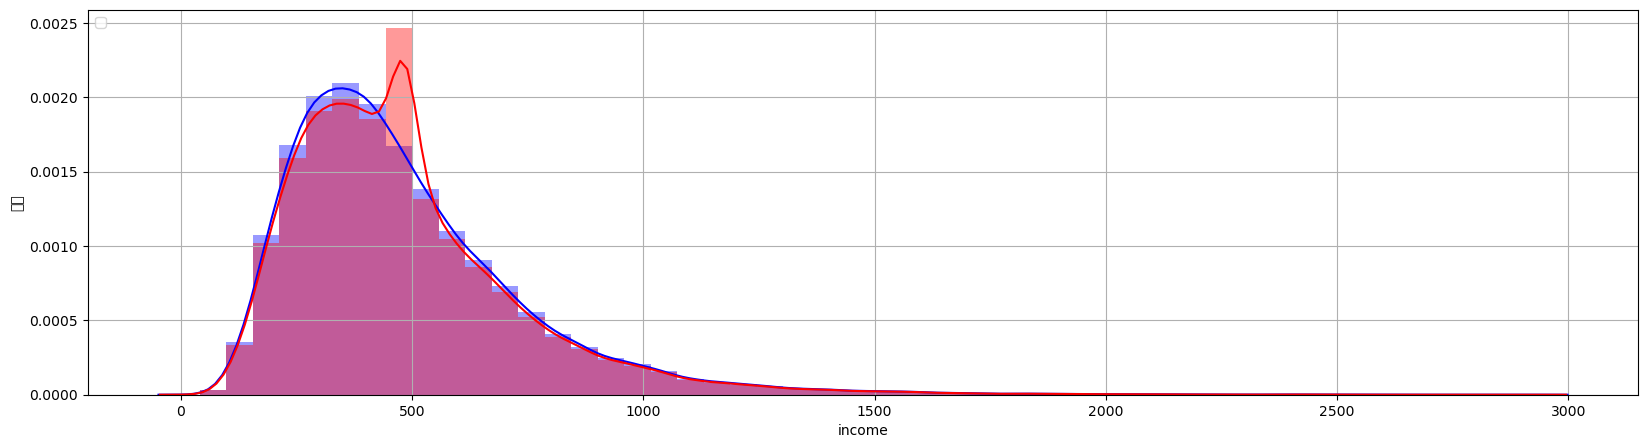

In [128]:
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax=plt.subplots(figsize = (20, 5))
ax.set_ylabel('密度')
plt.legend(loc='upper left')
plt.grid()

sns.distplot(table['income'], label='before', kde=True, bins=50, color='b')

user_table_fillna = table.copy()

user_table_fillna['income'] = table['income'].fillna(table['income'].mean())
sns.distplot(user_table_fillna['income'], label='after', kde=True, bins=50, color='r')


In [131]:
table['income'].mean()

483.63813687573565